In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
data = pd.read_csv('voice.csv')
data.shape

(3168, 21)

In [123]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [124]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [125]:
#1. We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”, 
#identify the target variable and do a one-hot encoding for the same. 
#Split the dataset in train-test with 20% of the data kept aside for testing.
#[Hint: Refer to LabelEncoder documentation in scikit-learn]


In [126]:
# encoding target variable 'label'

Le = LabelEncoder()
data['label']=Le.fit_transform(data['label'])

In [127]:
data['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [128]:
# splitting 20% data for test

Train, Test = train_test_split(data,test_size=0.2)

In [129]:
print("Train Shape",Train.shape)
print("Test shape",Test.shape)

Train Shape (2534, 21)
Test shape (634, 21)


In [130]:
#2. Fit a logistic regression model and measure the accuracy on the test set.
#[Hint: Refer to Linear Models section in scikit-learn]

In [131]:
XCols = data.drop('label',axis=1).columns

XTrain = Train[XCols]
XTest = Test[XCols]

YTrain = Train['label']
YTest = Test['label']

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(XTrain,YTrain)


LogisticRegression()

In [132]:
model.coef_

array([[-8.58718310e-01,  1.60218331e+00, -1.08189373e+00,
        -6.29445551e+00,  2.69716622e+00,  8.99162173e+00,
        -4.18702542e-01,  1.19297016e-02,  4.60794337e+00,
        -1.33432533e+00,  7.44147681e-01, -8.58718310e-01,
        -1.51493388e+01, -1.10258775e-01, -2.21402134e+00,
        -4.32253308e-02, -1.55439533e+00, -8.23754302e-01,
         7.30641033e-01, -1.59365339e+00]])

In [133]:
model.intercept_

array([0.69876577])

In [134]:
predictions = model.predict(XTest)
newdf = XTest
newdf['Actual']=YTest
newdf['Prediction']=predictions


In [135]:
accuracy1 = metrics.accuracy_score(newdf['Actual'],newdf['Prediction'])

In [136]:
metrics.confusion_matrix(newdf['Actual'],newdf['Prediction'])

array([[272,  55],
       [ 19, 288]], dtype=int64)

In [137]:
newdf.shape

(634, 22)

In [ ]:
3. Compute the correlation matrix that describes the dependence between all predictors and identify 
the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate method]

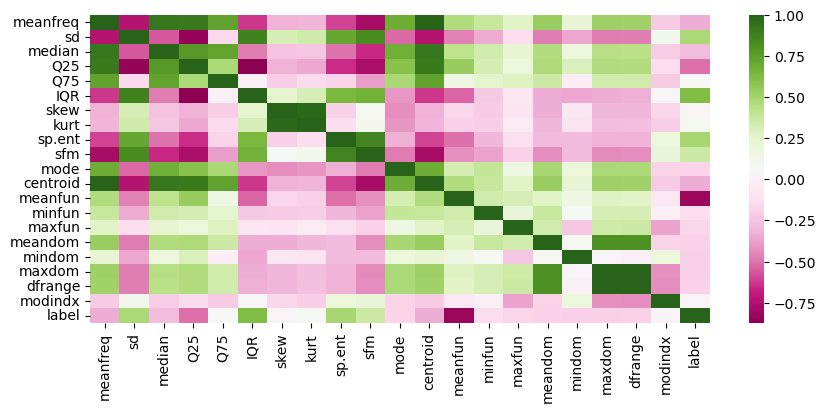

In [138]:
corr = data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='PiYG')
plt.show()

In [ ]:
#Following are the variables highly correlated with prediction

meanfreq
median
Q25
Q75
mode
centroid
meanfun
minfun
maxfun
meandom
mindom
maxdom
dfrange

In [36]:
#4. Based on correlation remove those predictors that are correlated and 
#fit a logistic regression model again and compare the accuracy with that of previous model.
#[Hint: Identify correlated variable pairs and remove one among them]

In [ ]:
#following are the 4 groups of values and would like to drop the first group

# group 1
'meanfreq', 'median', 'centroid', 'Q25' # remove

# group 2
minfun, maxfun

# group 3
meanfun, mindom, 

# group 4
meandom, maxdom, dfrange

In [140]:
#remove the group 1
data = data.drop(['meanfreq', 'median', 'centroid', 'Q25'],axis=1)

In [141]:
data

,sd,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.064241,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.067310,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.083829,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.072111,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.079146,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.084734,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.089221,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.095798,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.090628,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [142]:
X2Cols = data.drop('label',axis=1).columns

X2Train = Train[X2Cols]
X2Test = Test[X2Cols]

Y2Train = Train['label']
Y2Test = Test['label']

from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X2Train,Y2Train)

LogisticRegression()

In [143]:
predictions2 = model2.predict(X2Test)
newdf2 = X2Test
newdf2['Actual']=Y2Test
newdf2['Prediction']=predictions2

In [144]:
accuracy2 = metrics.accuracy_score(newdf2['Actual'],newdf2['Prediction'])

In [145]:
print("Accuracy1",accuracy1)
print("Accuracy2",accuracy2)

Accuracy1 0.8832807570977917
Accuracy2 0.862776025236593


In [ ]:
Difference in accuracy is only 2%.